<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_Naive_Bayes_WEEK_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assessment question**

In a dog eat dog world where people do anything for their benefit even though it might be detrimental to others, people are coming up with ways of riping each other of, such as sending people emails of how they might win large amounts of money if they submitted crucial information about themselves. Emails are particularly prone to these kind of false messages known as spam. There was therefore a need of separating these  spam messages from the normal messages. An algorithm was created to differentiate whether an email sent was spam or not spam. In our report we are going to create a similar algorithm that can separate the spam messages from the not spam messages.

**Defining the question**

To show how different variables contribute to predicting whether an email sent is spam or not.

**Defining the metric for success**

Our main focus will be to create an effective model that can accurately predict whether an email is spam or not. We will aim at an accuracy score ranging between **80 to 90 percent**. Below that range we risk underfitting and above that range we risk overfitting.

**Understanding the context**

We will be using one dataset which tells us the frequency of a word appearing in either a normal or spam message. We will be looking at these different factors and decide the best ones to use in building our model.

**Experimental Design**

We expect the following workflow:

* Data cleaning and preparation
  * Loading libraries and dataset
  * Deal with missing values
  * Deal with duplicated records
  * Check for outliers and anomalies
  * Check for multicollinearity
* Perform Exploratory Data Analysis
* Creating our Naive Bayes models
* Recommendation
* Conclusion





**Data Relevance**

Our dataset contains 57 columns that tell us the frequency a word or a character appears in a message, and 1 column that classifies the message as spam or not spam. We will be using the following columns in our prediction.

* char_freq_$	- the rate at which the dollar sign appears in our message.
* word_freq_remove - the rate at which the word 'remove' appears in our message.
* word_freq_00 - the rate at which '00' appears in our message.
* word_freq_receive	- the rate at which the word 'receive' appears in our message.
* word_freq_over - the rate at which the word 'over' appears in our message. 
* word_freq_internet - the rate at which the word 'internet' appears in our message.
* word_freq_free - the rate at which the word 'free' appears in our message.
* word_freq_our	- the rate at which the word 'our' appears in our message.
* word_freq_money - the rate at which the word 'money' appears in our message.
* word_freq_order	- the rate at which the word 'order' appears in our message.

In [160]:
# Importing our libraries.

import pandas as pd
import numpy as np

In [161]:
# Assigning each column a name and then loading our dataset.

names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people',
'word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_00','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650',
'word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',
'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
'capital_run_length_average','capital_run_length_longest','capital_run_length_total','Class']

df=pd.read_csv('/content/spambase.data',names=names)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_00,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [162]:
# Previewing the top of our dataset.

df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_00,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [163]:
# Checking the number of records in our dataset.

df.shape

(4601, 58)

In [164]:
# Checking for missing values.

df.isnull().sum().sum()

0

In [165]:
# Checking for duplicates.

df.duplicated().sum()

391

In [166]:
# Dropping the duplicates.

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [167]:
# Performing dimensionality reduction to pick the best 10 columns to use in our classification.


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

features=df.iloc[:, :-1]
label=df.iloc[:, -1]

lda=LDA()
feat=lda.fit(features,label)
lda_feat=feat.transform(features)
feat.coef_
importance=pd.DataFrame(index=features.columns.values, data=feat.coef_[0].T)
importance.sort_values(0,ascending=False).head(10)

,0
char_freq_$,2.377198
word_freq_remove,1.966993
word_freq_00,1.555275
word_freq_receive,1.338032
word_freq_over,1.073004
word_freq_internet,0.806390
word_freq_free,0.788806
word_freq_our,0.744870
word_freq_money,0.692884
word_freq_order,0.600602


In [168]:
# Removing any space that might be in our columns.

df.columns=df.columns.str.replace(' ','')

In [169]:
# Creating a dataframe of the most weighty columns to use for classification.

df=df[['char_freq_$','word_freq_remove','word_freq_00','word_freq_receive','word_freq_over','word_freq_internet','word_freq_free','word_freq_our','word_freq_money','word_freq_order','Class']]
df

,char_freq_$,word_freq_remove,word_freq_00,word_freq_receive,word_freq_over,word_freq_internet,word_freq_free,word_freq_our,word_freq_money,word_freq_order,Class
0,0.000,0.00,0.00,0.00,0.00,0.00,0.32,0.32,0.00,0.00,1
1,0.180,0.21,0.43,0.21,0.28,0.07,0.14,0.14,0.43,0.00,1
2,0.184,0.19,1.16,0.38,0.19,0.12,0.06,1.23,0.06,0.64,1
3,0.000,0.31,0.00,0.31,0.00,0.63,0.31,0.63,0.00,0.31,1
4,0.000,0.31,0.00,0.31,0.00,0.63,0.31,0.63,0.00,0.31,1
...,...,...,...,...,...,...,...,...,...,...,...
4596,0.000,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0
4597,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4598,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4599,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0


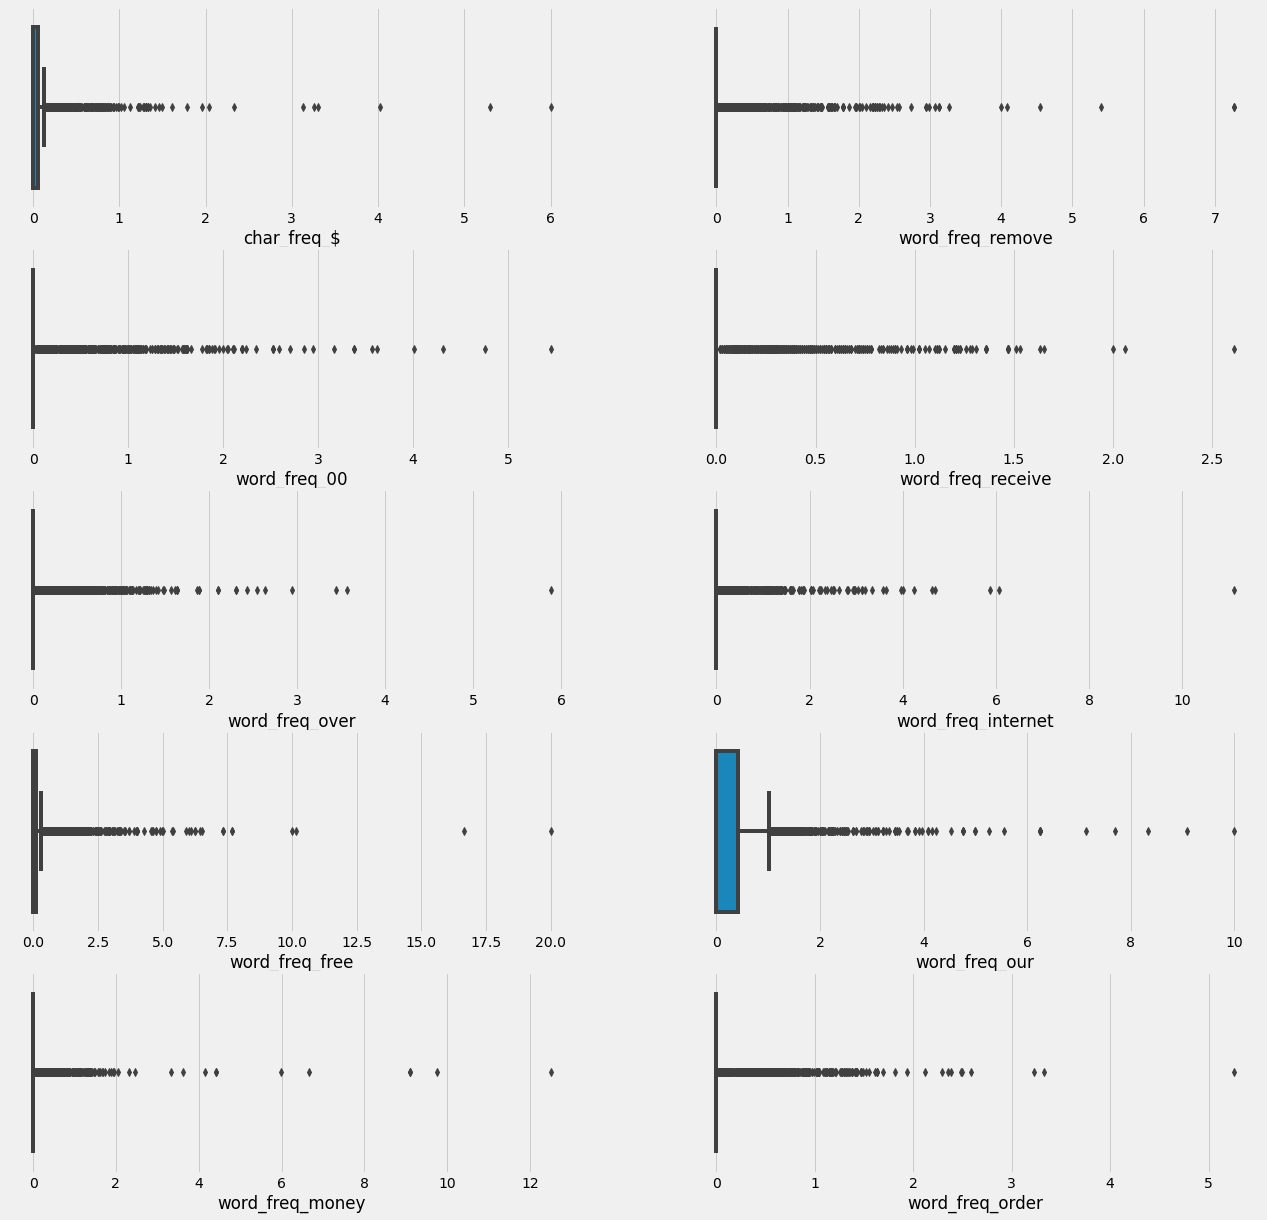

In [170]:
# Checking for outliers.

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
f, axes = plt.subplots(5,2, figsize=(20,20))

sns.boxplot(data=df,x='char_freq_$', ax=axes[0,0])
sns.boxplot(data=df,x='word_freq_remove', ax=axes[0,1])
sns.boxplot(data=df,x='word_freq_00', ax=axes[1,0])
sns.boxplot(data=df,x='word_freq_receive', ax=axes[1,1])
sns.boxplot(data=df,x='word_freq_over', ax=axes[2,0])
sns.boxplot(data=df,x='word_freq_internet', ax=axes[2,1])
sns.boxplot(data=df,x='word_freq_free', ax=axes[3,0])
sns.boxplot(data=df,x='word_freq_our', ax=axes[3,1])
sns.boxplot(data=df,x='word_freq_money', ax=axes[4,0])
sns.boxplot(data=df,x='word_freq_order', ax=axes[4,1])


We have a lot of outliers in our dataset. Since they cover a large proportion of our dataset, we will not drop them. If we retain them we will have to scale our data before creating our model to take the outliers into consideration.

In [171]:
# Checking the statistical summary in our dataset.

df.describe()

,char_freq_$,word_freq_remove,word_freq_00,word_freq_receive,word_freq_over,word_freq_internet,word_freq_free,word_freq_our,word_freq_money,word_freq_order,Class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.076057,0.117475,0.100622,0.056686,0.096656,0.108000,0.253829,0.325321,0.090969,0.091860,0.398812
std,0.239708,0.397284,0.351336,0.184167,0.276030,0.410282,0.797534,0.687805,0.431723,0.282144,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127500,0.410000,0.000000,0.000000,1.000000
max,6.003000,7.270000,5.450000,2.610000,5.880000,11.110000,20.000000,10.000000,12.500000,5.260000,1.000000


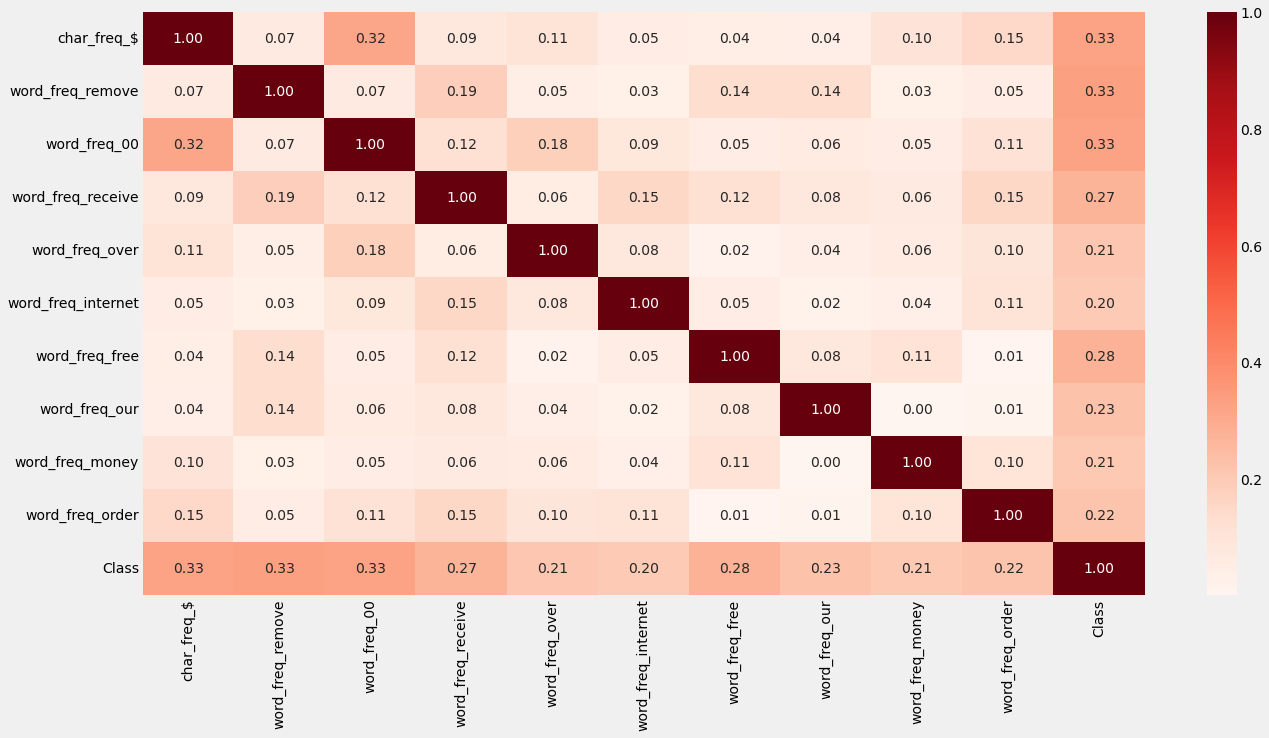

In [172]:
# Checking for any correlation among the features using a heatmap,

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

From the heatmap above we can see that from the 10 best performing columns we picked, each column is independent of the other. We can confirm this by checking the VIF score of each column.

In [173]:
# Looking for the highly correlated features.

correlations =df.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,char_freq_$,word_freq_remove,word_freq_00,word_freq_receive,word_freq_over,word_freq_internet,word_freq_free,word_freq_our,word_freq_money,word_freq_order,Class
char_freq_$,1.199026,0.035254,-0.274154,0.013614,-0.006347,0.027296,0.045127,0.031927,-0.044327,-0.084264,-0.314137
word_freq_remove,0.035254,1.153803,0.042298,-0.125700,0.016360,0.048770,-0.042035,-0.062918,0.039256,0.026545,-0.377913
word_freq_00,-0.274154,0.042298,1.205630,-0.048200,-0.128433,-0.017286,0.025117,0.003540,0.030256,-0.017254,-0.283643
word_freq_receive,0.013614,-0.125700,-0.048200,1.121514,0.010985,-0.112244,-0.058240,-0.018193,-0.008497,-0.110119,-0.185494
word_freq_over,-0.006347,0.016360,-0.128433,0.010985,1.068911,-0.036100,0.040932,0.001075,-0.018721,-0.044730,-0.182191
word_freq_internet,0.027296,0.048770,-0.017286,-0.112244,-0.036100,1.061612,0.002786,0.023284,0.012297,-0.056601,-0.190502
word_freq_free,0.045127,-0.042035,0.025117,-0.058240,0.040932,0.002786,1.103041,-0.012380,-0.070593,0.065425,-0.307445
word_freq_our,0.031927,-0.062918,0.003540,-0.018193,0.001075,0.023284,-0.012380,1.065746,0.047855,0.033160,-0.249380
word_freq_money,-0.044327,0.039256,0.030256,-0.008497,-0.018721,0.012297,-0.070593,0.047855,1.057478,-0.057736,-0.200026
word_freq_order,-0.084264,0.026545,-0.017254,-0.110119,-0.044730,-0.056601,0.065425,0.033160,-0.057736,1.085474,-0.179324


None of the VIF scores are greater than five and this proves that we are using independent features.

Our dataset consists of continuous variables and therefore we are going to use Gaussian Naive Bayes for our classification. This algorithm however assumes normality in our features. However, we will not normalize our features since there is no high variance in our values. We can see from our statistical summary that the minimum value is **0** and the highest value is **20**. We will however have to standardize our features to consider the high number of outliers we have in our dataset.

In [175]:
# Standardizing our features.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df.iloc[:, :-1]=scaler.fit_transform(df.iloc[:, :-1])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


**Using a 80-20 set to create our model.**

In [176]:
#  Importing the required libraries and splitting our dataset into the train and test sets.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X=df.iloc[:, :-1]
y=df.iloc[:, -1]

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=0)

# Fitting our Gaussian model.

classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [177]:
# Making our prediction.

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [178]:
# Checking the quality of our model.

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.827790973871734
[[465  30]
 [115 232]]


Our **80-20 set** has an accuracy score of **82.8%**, **697** correct predictions and **145** incorrect predictions. From these metrics, we can see that we have a really good model which does not underfit or overfit. 

**Using a 70-30 set to create our model.**

In [179]:
# Splitting our dataset and fitting our Gaussian model.

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.3, random_state=0)

classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [180]:
# Making our predictions.

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [181]:
# Checking the quality of our model.

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8392715756136183
[[692  45]
 [158 368]]


The accuracy score from our 70-30 set increases to **83.9%**. From our confusion matrix, we have **1060** correct predictions and **203** incorrect predictions.

**Using a 60-40 set to create our model.**

In [182]:
# Splitting our dataset and fitting our Gaussian model.

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.4, random_state=0)

classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [183]:
# Making our prediction.

y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [184]:
# Checking the quality of our model.

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8402612826603325
[[930  64]
 [205 485]]


The accuracy score in our 60-40 set increases to **84%**. We also have **269** incorrect predictions and **1415** correct predictions from our confusion matrix.

**Recomendation**

To improve our model, we can perform further dimensionality reduction to get like 2 key variables which we can use for our classification. 

**Conclusion**

None of our models overfit or underfit our training data. The accuracy scores are within the range we are looking for. In regards to the best model we should use, we should go with the model with the highest accuracy. In our case, the **60-40** set which has an **84%** accuracy score.